In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 12.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=e626ed0c34fff8b4008e5d371e6e1e25899ebd822caf5c364b8145e07dd6a357
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Mapping

In [ ]:
CPU = {
    "model": {m: (33.33 / 4) * (idx+1) for idx, m in enumerate((3,5,7,9))},
    "generation": {g: (33.33 / 8) * (idx+1) for idx, g in enumerate(range(5,13))},
    "serie": {s: (33.33 / 6) * (idx+1) for idx, s in enumerate(("U", "B", "H", "K", "Z", "X"))}
}

In [ ]:
RAM = {ram: round((100 / 11) * (idx+1), 4) for idx, ram in enumerate((2,4,6,8,10,12,16,24,32,64,128))}

In [ ]:
RAM

{2: 9.0909,
 4: 18.1818,
 6: 27.2727,
 8: 36.3636,
 10: 45.4545,
 12: 54.5455,
 16: 63.6364,
 24: 72.7273,
 32: 81.8182,
 64: 90.9091,
 128: 100.0}

# Initialization

## Antecedents and consequents

In [ ]:
cpu = ctrl.Antecedent(np.arange(0, 101, 1), 'cpu')
ram = ctrl.Antecedent(np.arange(0, 101, 1), 'ram')

cpu.automf(3)
ram.automf(3)

In [ ]:
improve_cpu = ctrl.Consequent(np.arange(0, 100, 1), 'improve_cpu')
improve_cpu['low'] = fuzz.trimf(improve_cpu.universe, [0, 0, 33])
improve_cpu['medium'] = fuzz.trimf(improve_cpu.universe, [0, 33, 66])
improve_cpu['high'] = fuzz.trimf(improve_cpu.universe, [33, 66, 100])

In [ ]:
improve_ram = ctrl.Consequent(np.arange(0, 100, 1), 'improve_ram')
improve_ram['low'] = fuzz.trimf(improve_ram.universe, [0, 0, 33])
improve_ram['medium'] = fuzz.trimf(improve_ram.universe, [0, 33, 66])
improve_ram['high'] = fuzz.trimf(improve_ram.universe, [33, 66, 100])

## Average visualization of CPU

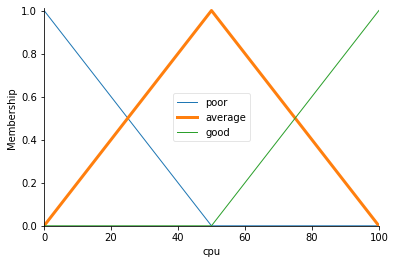

In [ ]:
cpu["average"].view()

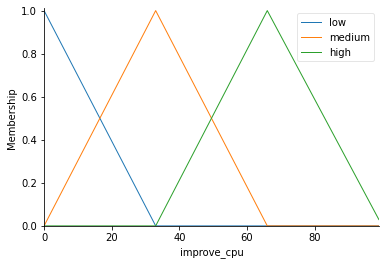

In [ ]:
improve_cpu.view()

## Average visualization of RAM

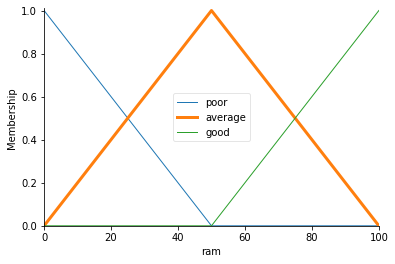

In [ ]:
ram["average"].view()

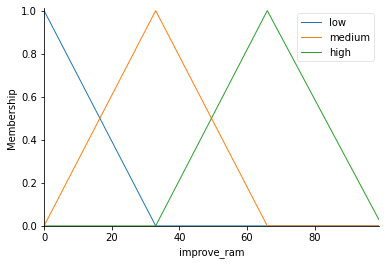

In [ ]:
improve_ram.view()

# Rules

## Speed

In [ ]:
speed_rules = [
    ctrl.Rule(cpu["poor"] & ram["poor"], improve_ram["low"]),
    ctrl.Rule(cpu["average"] & ram["poor"], improve_ram["medium"]),
    ctrl.Rule(cpu["good"] & ram["poor"], improve_ram["medium"]),
    ctrl.Rule(cpu["average"], improve_ram["high"]),
    ctrl.Rule(cpu["average"] & ram["average"], improve_ram["high"]),
    ctrl.Rule(cpu["good"] & ram["average"], improve_ram["high"]),
    ctrl.Rule(cpu["good"] & ram["good"], improve_ram["high"]),
]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

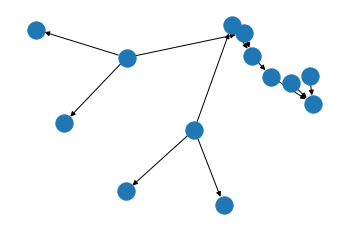

In [ ]:
speed_rules[0].view()

## Performance

In [ ]:
performance_rules = [
    ctrl.Rule(cpu["poor"] & ram["poor"], improve_cpu["medium"]),
    ctrl.Rule(cpu["poor"] & ram["average"], improve_cpu["medium"]),
    ctrl.Rule(cpu["average"] & ram["average"], improve_cpu["high"]),
    ctrl.Rule(cpu["good"] & ram["average"], improve_cpu["high"]),
    ctrl.Rule(cpu["good"] & ram["good"], improve_cpu["high"]),
    ctrl.Rule(cpu["good"], improve_cpu["high"]),
    ctrl.Rule(ram["good"], improve_cpu["high"]),
]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

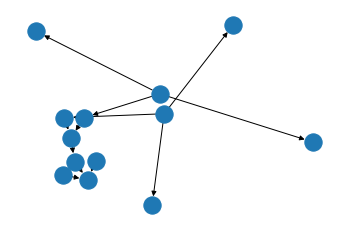

In [ ]:
performance_rules[0].view()

# Controllers

## Speed

In [ ]:
speed_ctrl = ctrl.ControlSystem(speed_rules)

In [ ]:
speed_improver = ctrl.ControlSystemSimulation(speed_ctrl)

In [ ]:
cpu_value = CPU["model"][3] + CPU["generation"][5] + CPU["serie"]["U"]
cpu_value

18.05375

In [ ]:
speed_improver.inputs({
    "cpu": cpu_value,
    "ram": RAM[2]
})

In [ ]:
speed_improver.compute()

In [ ]:
speed_improver.output["improve_ram"]

42.383706665762205

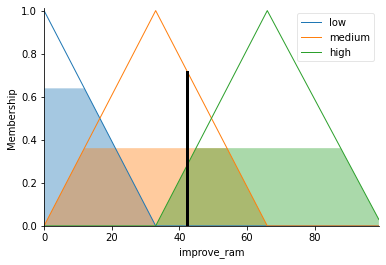

In [ ]:
improve_ram.view(sim=speed_improver)

## Performance

In [ ]:
performance_ctrl = ctrl.ControlSystem(performance_rules)

In [ ]:
performance_improver = ctrl.ControlSystemSimulation(performance_ctrl)

In [ ]:
cpu_value = CPU["model"][9] + CPU["generation"][12] + CPU["serie"]["X"]
cpu_value

99.99

In [ ]:
performance_improver.inputs({
    "cpu": cpu_value,
    "ram": RAM[128]
})

In [ ]:
performance_improver.compute()

In [ ]:
performance_improver.output["improve_cpu"]

66.31884057971017

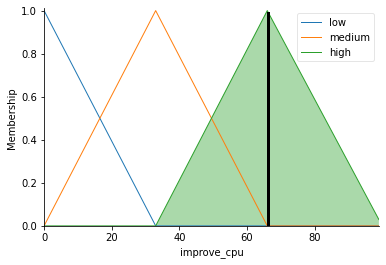

In [ ]:
improve_cpu.view(sim=performance_improver)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07e29549-6cbf-4e88-b69c-0fc48f2d6023' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>